In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
x = np.loadtxt('ex4x.dat')
y = np.loadtxt('ex4y.dat')

In [3]:
# plt.plot(x, y, 'o')
# plt.ylabel('Prices')
# plt.xlabel('Living area and # of bedrooms')
# plt.show()
print(x, y)

[[55.5 69.5]
 [41.  81.5]
 [53.5 86. ]
 [46.  84. ]
 [41.  73.5]
 [51.5 69. ]
 [51.  62.5]
 [42.  75. ]
 [53.5 83. ]
 [57.5 71. ]
 [42.5 72.5]
 [41.  80. ]
 [46.  82. ]
 [46.  60.5]
 [49.5 76. ]
 [41.  76. ]
 [48.5 72.5]
 [51.5 82.5]
 [44.5 70.5]
 [44.  66. ]
 [33.  76.5]
 [33.5 78.5]
 [31.5 72. ]
 [33.  81.5]
 [42.  59.5]
 [30.  64. ]
 [61.  45. ]
 [49.  79. ]
 [26.5 64.5]
 [34.  71.5]
 [42.  83.5]
 [29.5 74.5]
 [39.5 70. ]
 [51.5 66. ]
 [41.5 71.5]
 [42.5 79.5]
 [35.  59.5]
 [38.5 73.5]
 [32.  81.5]
 [46.  60.5]
 [36.5 53. ]
 [36.5 53.5]
 [24.  60.5]
 [19.  57.5]
 [34.5 60. ]
 [37.5 64.5]
 [35.5 51. ]
 [37.  50.5]
 [21.5 42. ]
 [35.5 58.5]
 [26.5 68.5]
 [26.5 55.5]
 [18.5 67. ]
 [40.  67. ]
 [32.5 71.5]
 [39.  71.5]
 [43.  55.5]
 [22.  54. ]
 [36.  62.5]
 [31.  55.5]
 [38.5 76. ]
 [40.  75. ]
 [37.5 63. ]
 [24.5 58. ]
 [30.  67. ]
 [33.  56. ]
 [56.5 61. ]
 [41.  57. ]
 [49.5 63. ]
 [34.5 72.5]
 [32.5 69. ]
 [36.  73. ]
 [27.  53.5]
 [41.  63.5]
 [29.5 52.5]
 [20.  65.5]
 [38.  65. ]

In [4]:
m = len(y)
x = np.c_[np.ones(m), x]

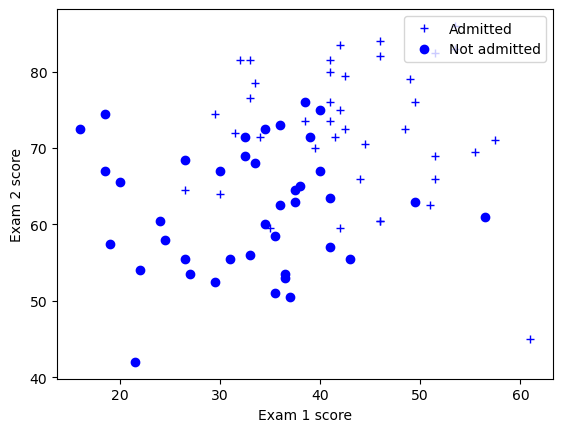

In [24]:
pos = np.where(y == 1)
neg = np.where(y == 0)

x_pos = x[pos]
y_pos = y[pos]
x_neg = x[neg]
y_neg = y[neg]

plt.plot(x_pos[0, 1], x_pos[0, 2], 'b+', label='Admitted')
plt.plot(x_neg[0, 1], x_neg[0, 2], 'bo', label='Not admitted')
plt.legend(loc='upper right')
plt.plot(x_pos[1:, 1], x_pos[1:, 2], 'b+', label='Admitted')
plt.plot(x_neg[1:, 1], x_neg[1:, 2], 'bo', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(theta, x, y):
    m = len(y)
    h = sigmoid(x @ theta)
    return -1 / m * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))

class Optimizer:
    def __init__(self, x: np.ndarray, y: np.ndarray, theta: np.ndarray):
        self.x = x
        self.y = y
        self.theta = theta
    
    def forward(self):
        m = len(self.y)
        h = sigmoid(self.x @ self.theta)
        return -1 / m * (self.y.T @ np.log(h) + (1 - self.y).T @ np.log(1 - h))
    
    def step(self): # using newton's method
        m = len(self.y)
        h = sigmoid(self.x @ self.theta)
        grad = 1 / m * self.x.T @ (h - self.y)
        hessian = 1 / m * self.x.T @ np.diag(h) @ np.diag(1 - h) @ self.x
        self.theta -= np.linalg.inv(hessian) @ grad

In [29]:
theta = np.zeros(x.shape[1])
optimizer = Optimizer(x, y, theta)

for i in range(10 + 1):
    print(f"Cost at iter {i}: {optimizer.forward()}")
    optimizer.step()

Cost at iter 0: 0.6931471805599453
Cost at iter 1: 0.4409414251174191
Cost at iter 2: 0.40889169253305674
Cost at iter 3: 0.40551077605901753
Cost at iter 4: 0.4054474539166042
Cost at iter 5: 0.4054474249282527
Cost at iter 6: 0.40544742492824626
Cost at iter 7: 0.4054474249282463
Cost at iter 8: 0.40544742492824626
Cost at iter 9: 0.40544742492824626
Cost at iter 10: 0.40544742492824626


[-16.37874341   0.14834077   0.15890845]


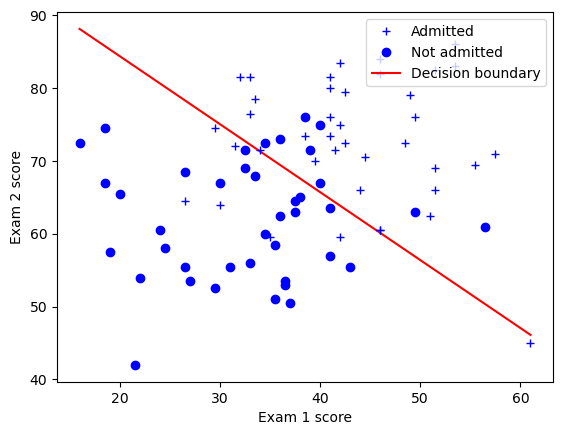

In [40]:
print(optimizer.theta)

plt.plot(x_pos[0, 1], x_pos[0, 2], 'b+', label='Admitted')
plt.plot(x_neg[0, 1], x_neg[0, 2], 'bo', label='Not admitted')
x1 = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)
x2 = (-optimizer.theta[0] - optimizer.theta[1] * x1) / optimizer.theta[2]
plt.plot(x1, x2, 'r-', label='Decision boundary')
plt.legend(loc='upper right')
plt.plot(x_pos[1:, 1], x_pos[1:, 2], 'b+', label='Admitted')
plt.plot(x_neg[1:, 1], x_neg[1:, 2], 'bo', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [42]:
'''
1. What values of θ did you get? How many iterations were required for
convergence?
2. What is the probability that a student with a score of 20 on Exam 1 and
a score of 80 on Exam 2 will not be admitted?
'''

print(f"Theta: {optimizer.theta}, and it took 5 iterations to converge.")

x_test = np.array([1, 20, 80])
prob = sigmoid(x_test @ optimizer.theta)
print(f"Probability of not being admitted: {1 - prob}")

Theta: [-16.37874341   0.14834077   0.15890845], and it took 5 iterations to converge.
Probability of not being admitted: 0.668021864022303
